In [1]:
import pandas as pd

ping_df = pd.read_csv('PING_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('VOICE_training_data.csv', delimiter='\t')
quake3_df = pd.read_csv('QUAKE3_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('DNS_training_data.csv', delimiter='\t')
csi_df = pd.read_csv('CSI_training_data.csv', delimiter='\t')
csa_df = pd.read_csv('CSA_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('TELNET_training_data.csv', delimiter='\t')
dataset = pd.concat([ping_df[3000:45940], voice_df, quake3_df, dns_df, telnet_df, csa_df, csi_df], ignore_index=True)

In [2]:
dataset['Traffic Type'].value_counts()

CSA       43009
DNS       42994
QUAKE3    42990
PING      42940
TELNET    42940
VOICE     42939
CSI       42901
Name: Traffic Type, dtype: int64

In [3]:
dataset['Traffic Type']=dataset['Traffic Type'].map({'TELNET': 0, 'QUAKE3':1, 'PING':2, 'VOICE':3, 'CSI':4, 'CSA':5, 'DNS':6})

In [4]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Traffic Type', axis=1)
y = dataset['Traffic Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=18)

In [5]:
X_train.shape[1]

16

In [19]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [20]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

model_fnn = models.Sequential([
  layers.Dense(16, activation='relu', input_dim=X_train.shape[1]),
  layers.Dense(32, activation='relu'),
  layers.Dense(7, activation='softmax')
])

model_fnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m, 'mse'])

model_fnn.fit(X_train, y_train, epochs=5)

model_fnn.evaluate(X_test, y_test)

Epoch 1/5
6579/6579 [==============================] - 16s 2ms/step - loss: 19482.5391 - accuracy: 0.4378 - f1_m: 0.9290 - precision_m: 0.8642 - recall_m: 1.0073 - mse: 12.2894
Epoch 2/5
6579/6579 [==============================] - 13s 2ms/step - loss: 3770.5947 - accuracy: 0.6253 - f1_m: 0.9256 - precision_m: 0.8608 - recall_m: 1.0038 - mse: 12.2897
Epoch 3/5
6579/6579 [==============================] - 13s 2ms/step - loss: 1010.5778 - accuracy: 0.7841 - f1_m: 0.9255 - precision_m: 0.8608 - recall_m: 1.0037 - mse: 12.2897
Epoch 4/5
6579/6579 [==============================] - 13s 2ms/step - loss: 390.1631 - accuracy: 0.8604 - f1_m: 0.9248 - precision_m: 0.8600 - recall_m: 1.0030 - mse: 12.2898
Epoch 5/5
2820/2820 [==============================] - 5s 2ms/step - loss: 0.0630 - accuracy: 0.9986 - f1_m: 0.9224 - precision_m: 0.8576 - recall_m: 1.0004 - mse: 12.2900


[0.06302404403686523,
 0.9986144304275513,
 0.9223520159721375,
 0.8576241135597229,
 1.0004311800003052,
 12.289973258972168]

In [21]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

model_fnn10 = models.Sequential([
  layers.Dense(16, activation='relu', input_dim=X_train.shape[1]),
  layers.Dense(32, activation='relu'),
  layers.Dense(7, activation='softmax')
])

model_fnn10.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m, 'mse'])

model_fnn10.fit(X_train, y_train, epochs=10)

model_fnn10.evaluate(X_test, y_test)

Epoch 1/10
6579/6579 [==============================] - 13s 2ms/step - loss: 7005.4189 - accuracy: 0.5192 - f1_m: 0.9297 - precision_m: 0.8650 - recall_m: 1.0079 - mse: 12.2893
Epoch 2/10
6579/6579 [==============================] - 13s 2ms/step - loss: 1119.2137 - accuracy: 0.8546 - f1_m: 0.9255 - precision_m: 0.8607 - recall_m: 1.0038 - mse: 12.2896
Epoch 3/10
6579/6579 [==============================] - 14s 2ms/step - loss: 664.8854 - accuracy: 0.9537 - f1_m: 0.9235 - precision_m: 0.8588 - recall_m: 1.0018 - mse: 12.2899
Epoch 4/10
6579/6579 [==============================] - 13s 2ms/step - loss: 249.6182 - accuracy: 0.9633 - f1_m: 0.9237 - precision_m: 0.8589 - recall_m: 1.0020 - mse: 12.2899
Epoch 5/10
6579/6579 [==============================] - 13s 2ms/step - loss: 42.4712 - accuracy: 0.9904 - f1_m: 0.9242 - precision_m: 0.8594 - recall_m: 1.0025 - mse: 12.2898
Epoch 6/10
6579/6579 [==============================] - 13s 2ms/step - loss: 28.2647 - accuracy: 0.8936 - f1_m: 1.0737 

[0.6055593490600586,
 0.7129270434379578,
 2.497624158859253,
 3.009141683578491,
 2.1641159057617188,
 12.24911880493164]

In [22]:
# X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = models.Sequential()
model.add(layers.SimpleRNN(16, input_shape=(X_train.shape[1], X_train.shape[2])))  # RNN layer
# model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(7, activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m, 'mse'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=12, verbose=1)

model.evaluate(X_test, y_test)



Epoch 1/10
17542/17542 [==============================] - 80s 4ms/step - loss: 1.1115 - accuracy: 0.5054 - f1_m: 3.7810 - precision_m: 27370932.0000 - recall_m: 2.5672 - mse: 12.2030
Epoch 2/10
17542/17542 [==============================] - 79s 4ms/step - loss: 1.0095 - accuracy: 0.5510 - f1_m: 3.2980 - precision_m: 2667883.0000 - recall_m: 2.3875 - mse: 12.2144
Epoch 3/10
17542/17542 [==============================] - 74s 4ms/step - loss: 1.2557 - accuracy: 0.4607 - f1_m: 4.1468 - precision_m: 19000686.0000 - recall_m: 2.6430 - mse: 12.2028
Epoch 4/10
17542/17542 [==============================] - 76s 4ms/step - loss: 1.1538 - accuracy: 0.4925 - f1_m: 3.6626 - precision_m: 6383537.0000 - recall_m: 2.4986 - mse: 12.2049
Epoch 5/10
17542/17542 [==============================] - 74s 4ms/step - loss: 1.0467 - accuracy: 0.5176 - f1_m: 3.5411 - precision_m: 3751568.7500 - recall_m: 2.4396 - mse: 12.2086
Epoch 6/10
17542/17542 [==============================] - 80s 5ms/step - loss: 1.0099 - 

[0.8128875494003296,
 0.6090185642242432,
 3.0211856365203857,
 4.695973873138428,
 2.2588627338409424,
 12.2219877243042]

In [23]:
# X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)

# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_rnn5 = models.Sequential()
model_rnn5.add(layers.SimpleRNN(16, input_shape=(X_train.shape[1], X_train.shape[2])))  # RNN layer
# model.add(layers.Flatten())
model_rnn5.add(layers.Dense(16, activation="relu"))
model_rnn5.add(layers.Dense(7, activation='softmax'))  # Output layer

# Compile the model
model_rnn5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m, 'mse'])

# Train the model
model_rnn5.fit(X_train, y_train, epochs=5, batch_size=12, verbose=1)

model_rnn5.evaluate(X_test, y_test)



Epoch 1/5
17542/17542 [==============================] - 83s 5ms/step - loss: 1.3877 - accuracy: 0.3901 - f1_m: 4.6502 - precision_m: 24703026.0000 - recall_m: 2.8911 - mse: 12.1894
Epoch 2/5
17542/17542 [==============================] - 90s 5ms/step - loss: 1.2195 - accuracy: 0.4622 - f1_m: 4.0298 - precision_m: 6022119.0000 - recall_m: 2.6360 - mse: 12.1996
Epoch 3/5
17542/17542 [==============================] - 90s 5ms/step - loss: 1.0850 - accuracy: 0.5082 - f1_m: 3.5269 - precision_m: 2610306.7500 - recall_m: 2.4371 - mse: 12.2065
Epoch 4/5
17542/17542 [==============================] - 87s 5ms/step - loss: 1.1138 - accuracy: 0.5042 - f1_m: 3.7136 - precision_m: 11573362.0000 - recall_m: 2.4550 - mse: 12.2068
Epoch 5/5
2820/2820 [==============================] - 7s 2ms/step - loss: 0.8429 - accuracy: 0.6104 - f1_m: 3.0366 - precision_m: 4.8152 - recall_m: 2.2499 - mse: 12.2173


[0.8429299592971802,
 0.6104041337966919,
 3.0366172790527344,
 4.815165996551514,
 2.2499477863311768,
 12.217326164245605]

In [10]:
# prompt: XGBoost classificaton on a labelised dataset and the metrics accuracy, mse, f1store, recall


from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
from xgboost import XGBClassifier

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=18)

# Create the model
model_xgb = XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Evaluate the model
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)


Accuracy: 0.9998891524597069
MSE: 0.0004323054071430155
F1 score: 0.9998891511694181
Recall: 0.9998891524597069


In [11]:
# prompt: AdaBoost classificaton on a labelised dataset and the metrics accuracy, mse, f1store, recall

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=18)

# Create the model
model_ada = AdaBoostClassifier()

# Train the model
model_ada.fit(X_train, y_train)

# Evaluate the model
y_pred = model_ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)


Accuracy: 0.42266167113751746
MSE: 2.908184982375241
F1 score: 0.35760880606702267
Recall: 0.42266167113751746


In [12]:
# prompt: CatBoost classificaton on a labelised dataset and the metrics accuracy, mse, f1store, recall
!pip install catboost

from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score
from catboost import CatBoostClassifier

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=18)

# Create the model
model_cat = CatBoostClassifier()

# Train the model
model_cat.fit(X_train, y_train)

# Evaluate the model
y_pred = model_cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("MSE:", mse)
print("F1 score:", f1)
print("Recall:", recall)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
Learning rate set to 0.103946
0:	learn: 1.5432224	total: 320ms	remaining: 5m 19s
1:	learn: 1.2984479	total: 552ms	remaining: 4m 35s
2:	learn: 1.0979631	total: 801ms	remaining: 4m 26s
3:	learn: 0.9560112	total: 1.04s	remaining: 4m 18s
4:	learn: 0.8295967	total: 1.3s	remaining: 4m 19s
5:	learn: 0.7370951	total: 1.52s	remaining: 4m 12s
6:	learn: 0.6522402	total: 1.77s	remaining: 4m 10s
7:	learn: 0.5889633	total: 1.97s	remaining: 4m 4s
8:	learn: 0.5291192	total: 2.21s	remaining: 4m 3s
9:	learn: 0.4729115	total: 2.48s	remaining: 4m 5s
10:	learn: 0.4305531	total: 2.7s	remaining: 4m 2s
11:	learn: 0.3941553	total: 2.93s	remaining: 4m 1s
12:	learn: 0.3561951	total: 3.18s	remaining: 4m 1s
13:	learn: 0.3239038	total: 3.49s	remaining: 4m 6s
14:	learn: 0.2938789	total: 3.73s	remaining: 4m 4s
15:	learn: 0.2708766	total: 3.94s	remaining: 4m 2s
16:	learn: 0.2473136	total: 4.15s	remaining: 4m
17:	learn: 0.2265654	total: 4.4

In [13]:
import pickle
print(pickle.format_version)

4.0


In [14]:
pickle.dump(model,open('rnn_10ep_binary', 'wb'))
pickle.dump(model_rnn5,open('rnn_5ep_binary', 'wb'))
pickle.dump(model_fnn10,open('fnn_10ep_binary', 'wb'))
pickle.dump(model_fnn,open('fnn_5ep_binary', 'wb'))

pickle.dump(model_xgb,open('xgboost_classifier_binary', 'wb'))
pickle.dump(model_ada,open('adaboost_classifier_binary', 'wb'))
pickle.dump(model,open('catboost_classifier_binary', 'wb'))

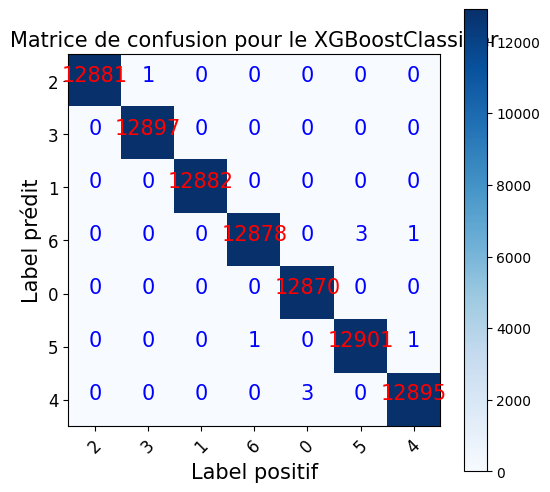

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=18)

predictions_xgb = model_xgb.predict(X_test)


xgb_cm = confusion_matrix(y_test,predictions_xgb)

plt.figure(figsize=(6,6))
plt.imshow(xgb_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le XGBoostClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks,y.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(xgb_cm)):
    for j in range(len(xgb_cm[i])):
        color= 'blue'
        if xgb_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(xgb_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )

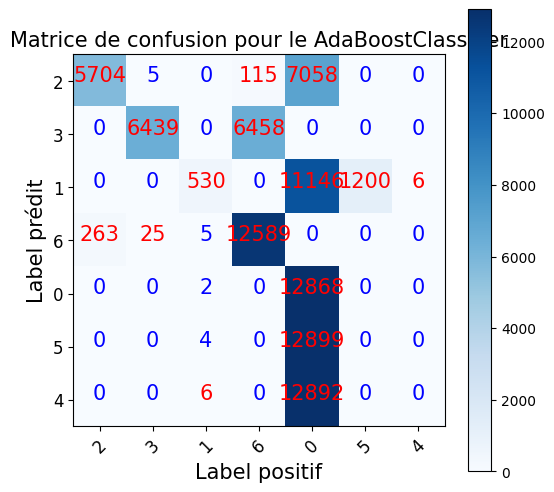

In [28]:
predictions_ada = model_ada.predict(X_test)


ada_cm = confusion_matrix(y_test,predictions_ada)

plt.figure(figsize=(6,6))
plt.imshow(ada_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le AdaBoostClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks,y.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(ada_cm)):
    for j in range(len(ada_cm[i])):
        color= 'blue'
        if ada_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(ada_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )

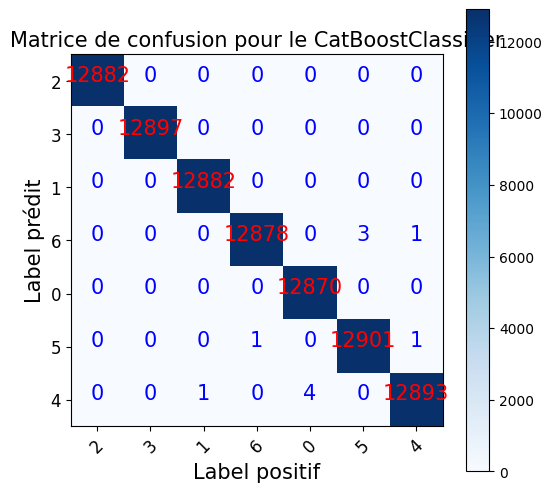

In [32]:
predictions_cat = model_cat.predict(X_test)


ada_cm = confusion_matrix(y_test,predictions_cat)

plt.figure(figsize=(6,6))
plt.imshow(ada_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le CatBoostClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks,y.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(ada_cm)):
    for j in range(len(ada_cm[i])):
        color= 'blue'
        if ada_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(ada_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )

In [31]:


predictions_fnn = model_fnn.predict(X_test)


fnn5ep_cm = confusion_matrix(y_test,predictions_fnn)

plt.figure(figsize=(6,6))
plt.imshow(fnn5ep_cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour le MLPClassifier',fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks,y.unique(),rotation=45,fontsize=12)
plt.yticks(tick_marks,y.unique(),fontsize=12)
plt.xlabel('Label positif', fontsize=15)
plt.ylabel('Label prédit', fontsize=15)

for i in range(len(fnn5ep_cm)):
    for j in range(len(fnn5ep_cm[i])):
        color= 'blue'
        if fnn5ep_cm[i][j] > 5:
            color = 'red'
        plt.text(j,i, format(fnn5ep_cm[i][j]),
                 horizontalalignment= 'center',
                 color = color,fontsize=15
                )

2820/2820 [==============================] - 6s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets